In [ ]:
import fmpy


filename = 'FMUInterfaceTester_MECS_regular.fmu'

start_values = {
    # variable                                   start   unit       description
    'T_Room_start_degC':                           (20, 'degC'),  # Inital room temperature in degC
    'Q_flow_heating_max':                      (4000.0, 'W'),     # Maximal capacity of room heater at fully open valve
    'add_heatFlows.k1':                              1,           # Gain of input signal 1
    'add_heatFlows.k2':                              1,           # Gain of input signal 2
    'integrator_Temperatur.k':                      (1, '1'),     # Integrator gain
    'source_TAmb.amplitude':                         5,           # Amplitude of sine wave
    'source_TAmb.f':           (1.1574074074074073E-05, 'Hz'),    # Frequency of sine wave
    'source_TAmb.phase':                            (0, 'rad'),   # Phase of sine wave
    'source_TAmb.offset':                          (-5, 'degC'),  # Offset of output signal y
    'source_TAmb.startTime':                   (-21600, 's'),     # Output y = offset for time < startTime
}

output = [
    'T_Raum_degC',        # Raumtemperatur in °C
    'grad_T_Raum_Kpers',  # Raumtemperaturgradient in K/s
    'r',
    'source_TAmb.y'
]

result = fmpy.simulate_fmu(filename, start_values=start_values, output=output, stop_time=60*60*24*5)

fmpy.plot_result(result)

In [36]:
# read the model description
model_description = fmpy.read_model_description(filename)


# get the value references for the variables we want to get/set
vrs = {variable.name:variable.valueReference for variable in model_description.modelVariables}

vr_outputs = [vrs[var] for var in output] #sensors


In [37]:
[var for var in model_description.modelVariables if var.causality == input]

[]

In [38]:
[var for var in model_description.modelVariables if var.causality == 'parameter']

[ScalarVariable(name='T_Room_start_degC', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='Q_flow_heating_max', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='add_heatFlows.k1', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='add_heatFlows.k2', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='integrator_Temperatur.k', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='source_TAmb.amplitude', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='source_TAmb.f', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='source_TAmb.phase', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='source_TAmb.offset', type='Real', clocks=[], dimensions=[], dimensionValueReferences=

In [39]:
[var for var in model_description.modelVariables if var.causality == 'local']

[ScalarVariable(name='T_amb_design_degC', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='T_room_design_degC', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='Q_flow_losses_nom', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='UA', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='mcp', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='expr_heatCapacity.y', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='div_TemperatureChangeRate.u1', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='div_TemperatureChangeRate.u2', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='div_TemperatureChangeRate.y', type='Real', clocks=[], dimensions=[], dimensionValueReferences=

In [40]:
[var.causality for var in model_description.modelVariables]

['parameter',
 'local',
 'local',
 'local',
 'local',
 'parameter',
 'local',
 'input',
 'output',
 'local',
 'local',
 'local',
 'local',
 'local',
 'local',
 'local',
 'local',
 'local',
 'local',
 'parameter',
 'parameter',
 'parameter',
 'local',
 'local',
 'local',
 'local',
 'local',
 'local',
 'local',
 'local',
 'local',
 'local',
 'local',
 'parameter',
 'parameter',
 'parameter',
 'local',
 'parameter',
 'parameter',
 'output',
 'output',
 'output']

In [41]:
vars(model_description.modelVariables[0])

{'name': 'T_Room_start_degC',
 'valueReference': 16777216,
 'type': 'Real',
 'description': 'Inital room temperature in degC',
 'causality': 'parameter',
 'variability': 'fixed',
 'initial': 'exact',
 'canHandleMultipleSetPerTimeInstant': True,
 'intermediateUpdate': False,
 'previous': None,
 'clocks': [],
 'declaredType': SimpleType(name='Modelica.Units.NonSI.Temperature_degC', type='Real', unit='degC'),
 'dimensions': [],
 'dimensionValueReferences': [],
 'quantity': None,
 'unit': None,
 'displayUnit': None,
 'relativeQuantity': False,
 'min': None,
 'max': None,
 'nominal': None,
 'unbounded': False,
 'start': '20',
 'derivative': None,
 'reinit': False,
 'sourceline': 173,
 'canBeDeactivated': False,
 'priority': None,
 'intervalVariability': None,
 'intervalDecimal': None,
 'shiftDecimal': None,
 'supportsFraction': False,
 'resolution': None,
 'intervalCounter': None,
 'shiftCounter': 0,
 '_python_type': float,
 'shape': ()}

In [ ]:
from fmpy import read_model_description, extract
from fmpy.fmi2 import FMU2Slave

# Path to the FMU
fmu_filename = 'FMUInterfaceTester_MECS_regular.fmu'

# Simulation parameters
start_time = 0.0
stop_time = 60*60*24*10  # 10 day simulation
control_update_interval = 60*60*24*3  # Control update every 3 days
step_size = 1  # Internal simulation step size

# Control logic 
def increase_valve_position(valve_position, increase = .2):
    return min(1.0,valve_position + increase)

# Load and extract the FMU
model_description = read_model_description(fmu_filename)
unzipdir = extract(fmu_filename)

# Instantiate the FMU for Co-Simulation or Model Exchange
fmu = FMU2Slave(guid=model_description.guid,
                unzipDirectory=unzipdir,
                modelIdentifier=model_description.coSimulation.modelIdentifier,  # Change for ME
                instanceName='instance')

# Initialize the FMU
fmu.instantiate()
fmu.setupExperiment(startTime=start_time)
fmu.enterInitializationMode()
fmu.exitInitializationMode()

# Simulation loop
current_time = start_time
next_control_update_time = control_update_interval
valve_position = 0

# Storage for results
time_log = []
control_log = []
output_log = []

while current_time < stop_time:
    # Calculate the duration until the next control update
    simulation_interval = min(next_control_update_time - current_time, stop_time - current_time)

    # Run the simulation for the interval
    fmu.doStep(currentCommunicationPoint=current_time, communicationStepSize=step_size)
    current_time += step_size

    # Update control value if at the control update time
    if abs(current_time - next_control_update_time) < step_size:
        valve_position = increase_valve_position(valve_position, 0.2)
        fmu.setReal([var.valueReference for var in model_description.modelVariables if var.name=='r'], [valve_position])  # Replace with input variable index
        next_control_update_time += control_update_interval  # Schedule next update

    # Retrieve output values and log 
    output_value = fmu.getReal([var.valueReference for var in model_description.modelVariables if var.name=='T_Raum_degC'])  # Replace with output variable index
    time_log.append(current_time)
    control_log.append(valve_position)
    output_log.append(output_value[0])
    
    #print(f"Time: {current_time:.2f}, Control: {valve_position}, Output: {output_value[0]}")

# Terminate and clean up
fmu.terminate()
fmu.freeInstance()


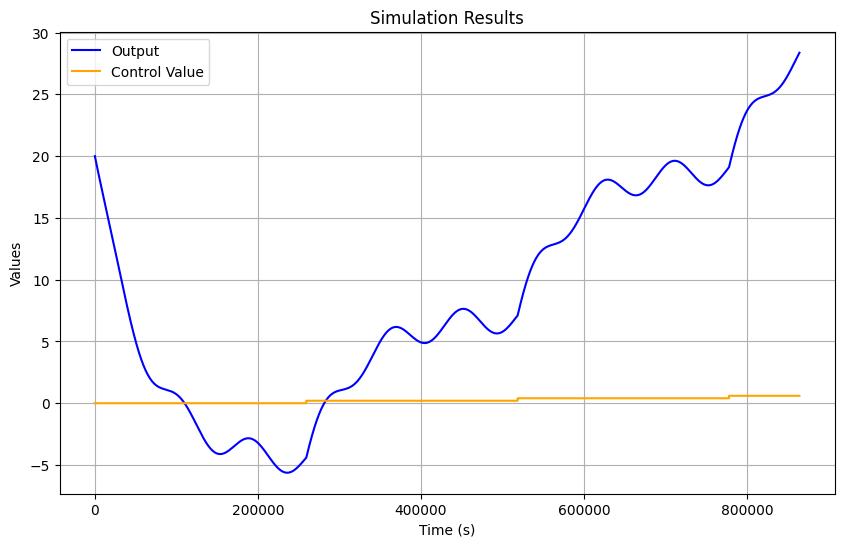

In [44]:
import matplotlib.pyplot as plt
# Plot results
plt.figure(figsize=(10, 6))

# Plot output values
plt.plot(time_log, output_log, label='Output', color='blue')

# Plot control values (optional, as a step function)
plt.step(time_log, control_log, label='Control Value', color='orange', where='post')

plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.title('Simulation Results')
plt.legend()
plt.grid()
plt.show()

In [45]:
from typing import Annotated, Any
from pydantic import BaseModel

class TankControlValues(BaseModel):
    valve_in: Annotated[bool, 'pump_dp_in']

class TankSensorValues(BaseModel):
    fill: float
    flow_in: float
    flow_out: float

class TankParameters(BaseModel):
    nominal_flow_in: float
    nominal_flow_out: float
    

class TankModel:
    def __init__(self, parameters: TankParameters):
        self.fill = 0
        self.nominal_flow_in = parameters.nominal_flow_in
        self.nominal_flow_out = parameters.nominal_flow_out 

    def simulate(self, control_values: TankControlValues):
        self.flow_in = self.nominal_flow_in if control_values.valve_in else 0
        self.flow_out = self.nominal_flow_out
        self.fill = self.fill + self.flow_in - self.flow_out

    def sensor_values(self) -> TankSensorValues:
        return TankSensorValues(fill = self.fill, flow_in = self.flow_in, flow_out = self.flow_out)


class Simulation:
    def __init__(self, model: Any):
        self.model = model
    
    #parsing fmu to BaseModel

    def step(self, control_values: BaseModel) -> BaseModel:
        self.model.simulate(control_values)
        return self.model.sensor_values()
    
    
#class Control should run control logic 